In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np  

In [2]:
file_path = r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\Cornudas_Geologic_Samples.csv'

In [3]:
 df = pd.read_csv(file_path, delimiter=',')

In [4]:
df.head()

,Type,Label,Symbol,LocationConfidenceMeters,IdentityConfidence,PlotAtScale,StationID,MapUnit,DataSourceID,MapText,Notes,GeologicPoints_ID,Latitude,Longitude,Age,Structure,RockType2,FieldSampleID,AlternateSampleID,RockType1
0,Sample,1,31.22,1,certain,0,CND001,Victorio Peak Fm,NaN,Pvc,Calcrete with limestone clasts,1,31.885300,-105.438300,permian,sedimentary layer,calcrete,CND001,001,sedimentary
1,Sample,4,31.22,1,certain,0,CND004,Hueco Fm,NaN,Ph,Marblized Ph,4,31.876204,-105.432912,permian,sedimentary layer,marble,CND004,004,metamorphic
2,Sample,5,31.22,1,certain,0,CND005,Tertiary intrusive,NaN,Ti,Contact between intrusive and Phm. Sample take...,5,31.875708,-105.433408,eocene,dike/sill/laccolith,syenite,CND005,005,igneous
3,Sample,6,31.22,1,certain,0,CND006,Hueco Fm,NaN,Ph,Angular Victorio Peak limestone clasts with ca...,6,31.875708,-105.433408,permian,sedimentary layer,conglomerate,CND006,006,sedimentary
4,Sample,7,31.22,1,certain,0,CND007,Hueco Fm,NaN,Ph,Calcite vein in limestone,7,31.889700,-105.444700,permian,vein,calcite,CND007,007,unidentified


In [5]:
mapunit_station_df = df[['MapUnit', 'StationID']]

In [6]:
mapunit_lists = {}

In [7]:
unique_mapunits = mapunit_station_df['MapUnit'].unique()
for mapunit in unique_mapunits:
    station_ids = mapunit_station_df[mapunit_station_df['MapUnit'] == mapunit]['StationID'].tolist()
    mapunit_lists[mapunit] = station_ids

In [8]:
print(mapunit_lists)

{'Victorio Peak Fm': ['CND001', 'CND018', 'CND039', 'CND101', 'CND122', 'CND129', 'CND131', 'CND214', 'CND241', 'CND250', 'CND251'], 'Hueco Fm': ['CND004', 'CND006', 'CND007', 'CND008', 'CND021', 'CND030', 'CND031', 'CND034', 'CND040', 'CND042', 'CND044', 'CND126', 'CND213', 'CND217', 'CND219'], 'Tertiary intrusive': ['CND005', 'CND012', 'CND014', 'CND017', 'CND019', 'CND020', 'CND027', 'CND028', 'CND029', 'CND035', 'CND036', 'CND038', 'CND043', 'CND045', 'CND046', 'CND105', 'CND107', 'CND109', 'CND111', 'CND114', 'CND115', 'CND116', 'CND121', 'CND123', 'CND124', 'CND125', 'CND127', 'CND128', 'CND130', 'CND132', 'CND201', 'CND202', 'CND203', 'CND206', 'CND207', 'CND208', 'CND209', 'CND210', 'CND211', 'CND215', 'CND216', 'CND218', 'CND220', 'CND230', 'CND234', 'CND235', 'CND236', 'CND255', 'CND256', 'CND901'], 'Cretaceous undivided': ['CND102', 'CND103', 'CND104', 'CND106', 'CND108', 'CND110', 'CND113', 'CND117', 'CND119', 'CND120', 'CND204', 'CND205', 'CND233', 'CND253']}


In [9]:
##'mapunit_lists' is a dictionary where each key is a MapUnit, and each value is a list of corresponding StationIDs

In [10]:
data_directory = r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\Cornudas_Processed_FieldSpec'

In [11]:
samples = os.listdir(data_directory)

In [12]:
print(samples)

['CND001', 'CND004', 'CND005', 'CND006', 'CND007', 'CND008', 'CND012', 'CND014', 'CND017', 'CND018', 'CND019', 'CND020', 'CND021', 'CND027', 'CND028', 'CND029', 'CND030', 'CND031', 'CND034', 'CND035', 'CND036', 'CND038', 'CND039', 'CND040', 'CND042', 'CND043', 'CND044', 'CND045', 'CND046', 'CND101', 'CND102', 'CND103', 'CND104', 'CND105', 'CND106', 'CND107', 'CND108', 'CND109', 'CND110', 'CND111', 'CND113', 'CND114', 'CND115', 'CND116', 'CND117', 'CND119', 'CND120', 'CND121', 'CND122', 'CND123', 'CND124', 'CND125', 'CND126', 'CND127', 'CND128', 'CND129', 'CND130', 'CND131', 'CND132', 'CND201', 'CND202', 'CND203', 'CND204', 'CND205', 'CND206', 'CND207', 'CND208', 'CND209', 'CND210', 'CND211', 'CND213', 'CND214', 'CND215', 'CND216', 'CND217', 'CND218', 'CND219', 'CND220', 'CND230', 'CND233', 'CND234', 'CNd235', 'CND236', 'CND241', 'CND250', 'CND251', 'CND253', 'CND255', 'CND256', 'CND901']


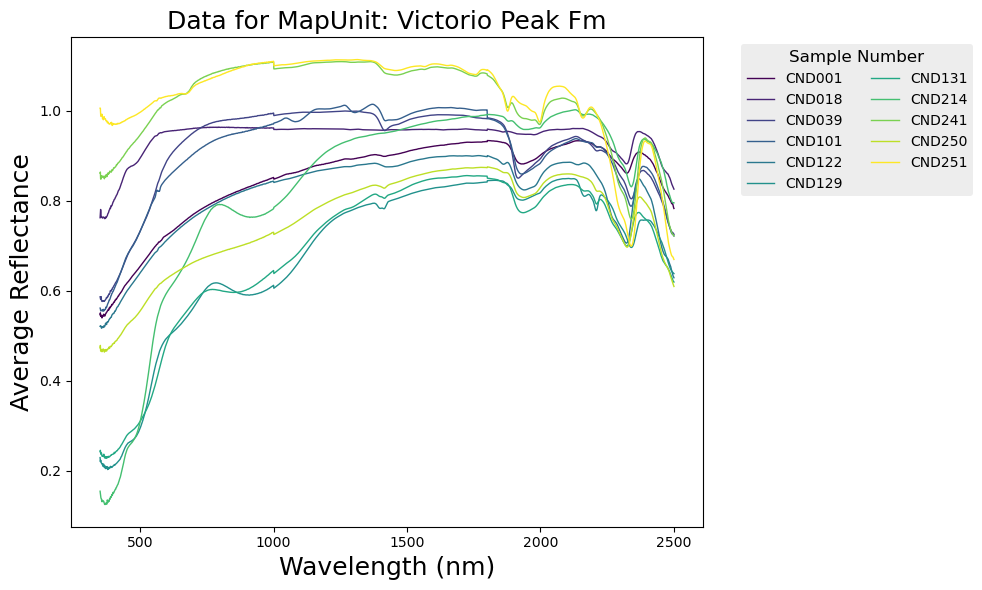

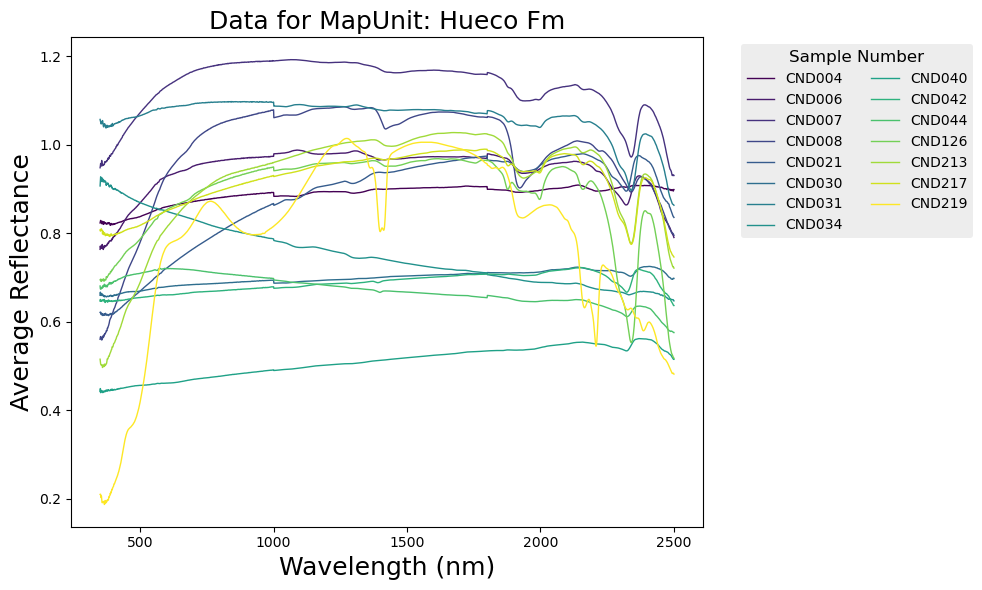

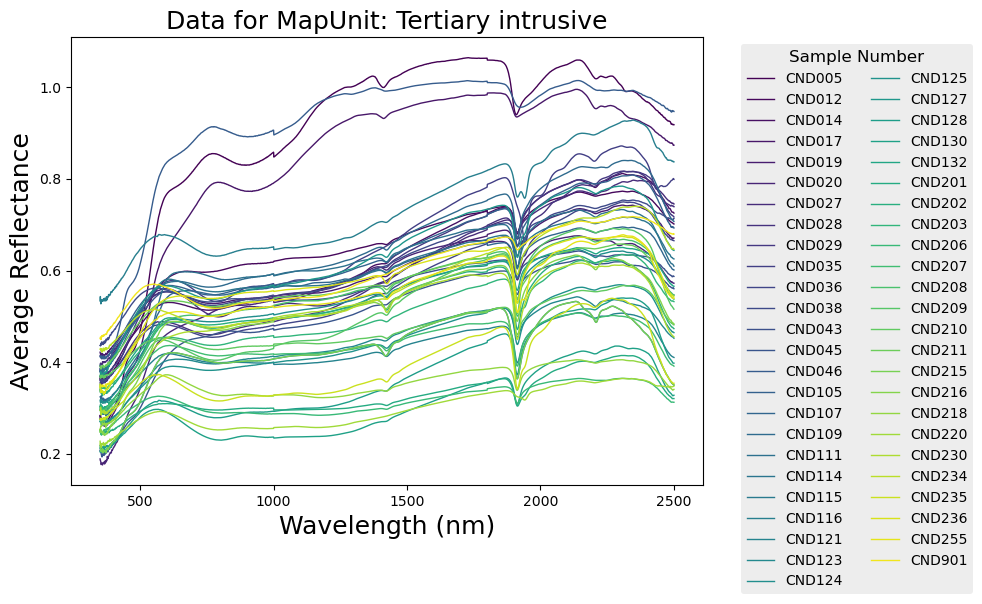

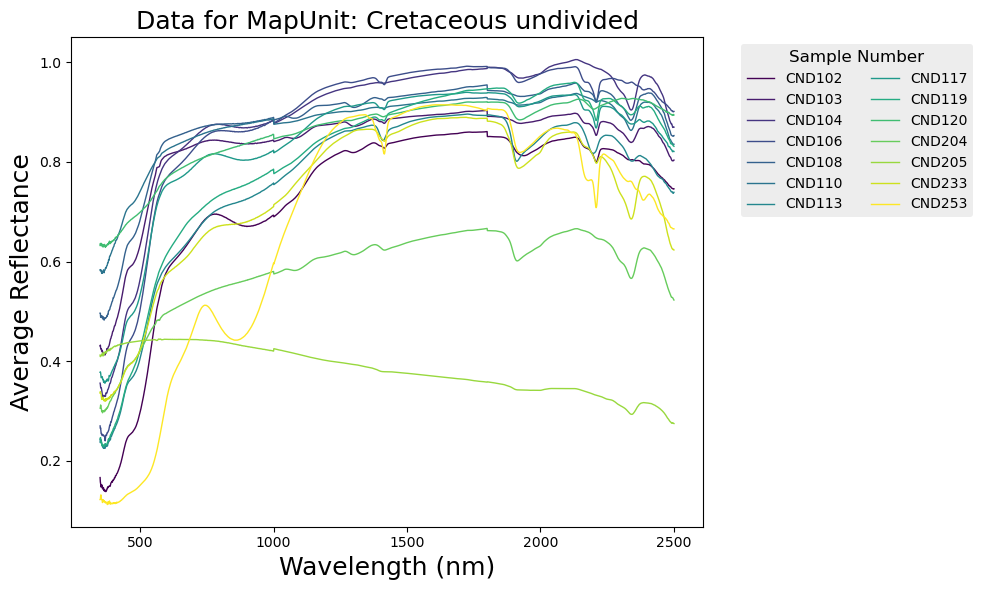

In [16]:
for map_unit, station_ids in mapunit_lists.items():
    # Determine the number of colors based on the number of station_ids in the current MapUnit
    num_colors = len(station_ids)

    # Create a custom colormap using 'viridis' with the specified number of colors
    cmap = plt.cm.viridis(np.linspace(0, 1, num_colors))

    # Create a color cycle based on the custom colormap
    color_cycle = iter(cmap)

    # Initialize a dictionary to store DataFrames for each StationID
    data_dict = {}

    # Loop through each StationID in the current MapUnit
    for station_id in station_ids:
        # Construct the file path for the CSV file
        subdirectory_path = os.path.join(data_directory, station_id)
        file_path = os.path.join(subdirectory_path, f'{station_id}_Average.csv')

        # Check if the CSV file exists and then read it
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            data_dict[station_id] = df

    # Plot the data for the current MapUnit
    plt.figure(figsize=(10, 6))
    for station_id, df in data_dict.items():
        color = next(color_cycle)
        plt.plot(df['Wavelength (nm)'], df['Average Reflectance'], label=station_id, color=color, linewidth=1.0)

    plt.xlabel('Wavelength (nm)', fontsize = 18 )
    plt.ylabel('Average Reflectance', fontsize = 18)

    # Create the legend with multiple columns and move it to the right of the graph
    legend = plt.legend(loc='upper left', title='Sample Number', ncol=2, bbox_to_anchor=(1.05, 1))

    # Adjust the legend appearance
    legend.get_title().set_fontsize(12)  # Set the title font size
    legend.get_frame().set_alpha(None)
    legend.get_frame().set_linewidth(0.0)  # Remove legend border
    legend.get_frame().set_facecolor((0.9, 0.9, 0.9, 0.7))  # Set legend background color

    plt.title(f'Data for MapUnit: {map_unit}', fontsize= 18)
    plt.tight_layout()
    plt.show()

In [ ]:
for map_unit, data_dict in mapunit_lists.items():
    # Define the filename for the CSV file for the current MapUnit
    export_filename = os.path.join(data_directory, f'{map_unit}_ExportedData.csv')

    # Combine the data from all StationIDs in the current MapUnit (if needed)
    combined_data = pd.concat(data_dict, axis=1)

    # Save the combined data (or data from a specific StationID) to a CSV file
    combined_data.to_csv(export_filename, index=False)


In [21]:
# ...

# Initialize a dictionary to store DataFrames for each MapUnit
mapunit_data_dict = {}

# Loop through each MapUnit
for map_unit, station_ids in mapunit_lists.items():
    # Initialize a DataFrame to store data for the current MapUnit
    mapunit_df = pd.DataFrame()

    # Loop through each StationID in the current MapUnit
    for station_id in station_ids:
        # Construct the file path for the CSV file
        subdirectory_path = os.path.join(data_directory, station_id)
        file_path = os.path.join(subdirectory_path, f'{station_id}_Average.csv')

        # Check if the CSV file exists and then read it
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            # Add a new column with the Station ID to the DataFrame
            df.insert(0, 'Station ID', station_id)
            mapunit_df = pd.concat([mapunit_df, df], ignore_index=True)

    # Store the DataFrame for the current MapUnit
    mapunit_data_dict[map_unit] = mapunit_df

# Loop through each MapUnit and display the DataFrame
for map_unit, df in mapunit_data_dict.items():
    print(f"Data for MapUnit: {map_unit}")
    print(df)
    print("\n")


Data for MapUnit: Victorio Peak Fm
      Station ID  Wavelength (nm)  Average Reflectance
0         CND001              350             0.546600
1         CND001              351             0.550700
2         CND001              352             0.543400
3         CND001              353             0.542800
4         CND001              354             0.545600
...          ...              ...                  ...
23656     CND251             2496             0.675012
23657     CND251             2497             0.673853
23658     CND251             2498             0.672555
23659     CND251             2499             0.670508
23660     CND251             2500             0.669461

[23661 rows x 3 columns]


Data for MapUnit: Hueco Fm
      Station ID  Wavelength (nm)  Average Reflectance
0         CND004            350.0             0.823500
1         CND004            351.0             0.826600
2         CND004            352.0             0.829300
3         CND004            35

In [22]:
output_directory = r'C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\Formation_Data_Compiled_Cornudas'

# Loop through each MapUnit and export the DataFrame to a CSV file in the specified directory
for map_unit, df in mapunit_data_dict.items():
    # Define the full path to the CSV file, including the output directory
    csv_file_path = os.path.join(output_directory, f'{map_unit}_data.csv')

    # Export the DataFrame to the CSV file
    df.to_csv(csv_file_path, index=False)

    print(f"Data for MapUnit: {map_unit} has been exported to {csv_file_path}")

Data for MapUnit: Victorio Peak Fm has been exported to C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\Formation_Data_Compiled_Cornudas\Victorio Peak Fm_data.csv
Data for MapUnit: Hueco Fm has been exported to C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\Formation_Data_Compiled_Cornudas\Hueco Fm_data.csv
Data for MapUnit: Tertiary intrusive has been exported to C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\Formation_Data_Compiled_Cornudas\Tertiary intrusive_data.csv
Data for MapUnit: Cretaceous undivided has been exported to C:\Users\shlbs\OneDrive - The University of Texas at Austin\Desktop\Formation_Data_Compiled_Cornudas\Cretaceous undivided_data.csv
